In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from cst_geometry_manager import Wire, Geometry
from cst_geometry_manager import simple_geometries

route_to_folder = "ABSOLUTE\\PATH\\TO\\FOLDER"

In [3]:
def length(point):
    return sum([point_i**2 for point_i in point])


def random_wires_in_sphere(sphere_radius, number_of_wires, wire_radius=1e-3, 
                           min_length=0.1, max_length=2):
    num = 0; wires = []
    while num < number_of_wires:
        random_point = np.random.uniform(low=0, high=sphere_radius, size=(3,))
        if length(random_point) <= sphere_radius**2:
            r = np.random.uniform(low=min_length, high=max_length)
            theta = np.random.uniform(low=0, high=np.pi)
            phi = np.random.uniform(low=0, high=2*np.pi)
            x = r * np.sin(theta) * np.cos(phi)
            y = r * np.sin(theta) * np.sin(phi)
            z = r * np.cos(theta)

            wire = Wire(
                point0 = random_point,
                point1 = random_point + [x, y, z]
            )
            num += 1
            wires.append(wire)
    
    return Geometry(wires)

random_wires_in_sphere(1, 2)

TypeError: __init__() got an unexpected keyword argument 'point0'

In [13]:
sampl = np.random.uniform(low=0, high=1, size=(3,))
sampl + [1,2,3]


array([1.87702007, 2.02089919, 3.70309241])

In [5]:
lengths = [i + 1 for i in range(6)]
circular_geometry = simple_geometries.get_circular_geometry(
    radius=1, lengths_of_wires=lengths, wire_radius=1e-3, delta_angle=0
)
circular_geometry


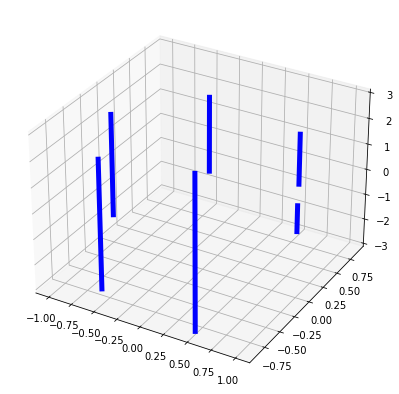

In [6]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

for wire in circular_geometry.wires:
    ax.plot((wire.x0, wire.x1), 
            (wire.y0, wire.y1), 
            (wire.z0, wire.z1), 
            'blue', linewidth=5.0)
    

In [7]:
lengths = np.full((3,4), 6)
cubic_grid = simple_geometries.get_cubic_grid_geometry(
    tau=1, lengths_of_wires=lengths, wire_radius=1e-3
)
cubic_grid.export_geometry(route_to_folder, 'cubic_grid')


cubic_grid.txt successfully added


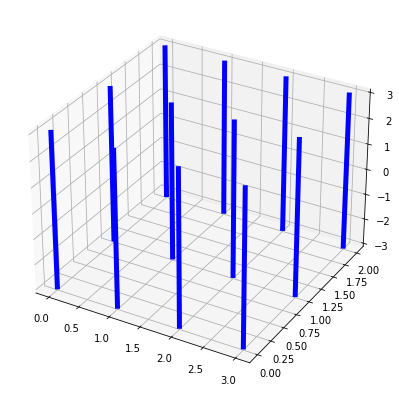

In [8]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

for wire in cubic_grid.wires:
    ax.plot((wire.x0, wire.x1), 
            (wire.y0, wire.y1), 
            (wire.z0, wire.z1), 
            'blue', linewidth=5.0)
    

In [9]:
shortened_taper = simple_geometries.get_shortened_taper_geometry(
    radius_inner=1, radius_outer=5, number_of_wires=4,
    taper_height=3, wire_radius=1e-3,
    delta_angle=0
)

shortened_taper_rotated = simple_geometries.get_shortened_taper_geometry(
    radius_inner=1, radius_outer=5, number_of_wires=4,
    taper_height=3, wire_radius=1e-3,
    delta_angle=np.pi/4
)
shortened_taper


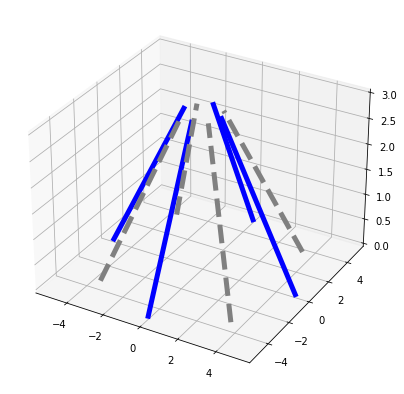

In [10]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

for wire in shortened_taper.wires:
    ax.plot((wire.x0, wire.x1), 
            (wire.y0, wire.y1), 
            (wire.z0, wire.z1), 
            'blue', linewidth=5.0)
    
for wire in shortened_taper_rotated.wires:
    ax.plot((wire.x0, wire.x1), 
            (wire.y0, wire.y1), 
            (wire.z0, wire.z1), 
            'gray', linewidth=5.0, linestyle='--')
    

In [11]:
shortened_taper_rotated.export_geometry(route_to_folder, 'shortened_taper_rotated')


shortened_taper_rotated.txt successfully added
